# Tirgul 8: Dementia Prediction with Tree-based Models


In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error as mse

# Read Data

In [164]:
data = pd.read_csv('oasis_cross-sectional.csv')

data.tail()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
431,OAS1_0285_MR2,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,2.0
432,OAS1_0353_MR2,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,40.0
433,OAS1_0368_MR2,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,89.0
434,OAS1_0379_MR2,F,R,20,NaN,NaN,NaN,NaN,1262,0.861,1.390,2.0
435,OAS1_0395_MR2,F,R,26,NaN,NaN,NaN,NaN,1283,0.834,1.368,39.0


# Feature selection
- Filter data
- Determine prediction label
- Label categorization
- Train/Test split

In [174]:
features = ['M/F','Hand','Age','Educ','SES','MMSE','eTIV','nWBV','ASF']
pred_label = ['CDR']
data = data[features + pred_label].dropna()

# Turning values into categories
data['M/F'] = data['M/F'].astype('category').cat.codes
data['Hand'] = data['Hand'].astype('category').cat.codes
data['CDR'] = data['CDR'].astype('category').cat.codes

X = data[features]
y = data[pred_label]


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)  

# Evaluation function

In [175]:
def eval(x,y,model):
    pred = model.predict(x)
    y_alt=y.values
    print("Acc: {:.3f}".format((pred == y_alt).mean()))
    
    pred[pred==1] = 0.5
    pred[pred==2] = 1
    pred[pred==3] = 2
    
    y_alt[y==1] = 0.5
    y_alt[y==2] = 1
    y_alt[y==3] = 2
    print("MSE: {:.3f}".format(mse(pred,y_alt)))   
    


# Tree plotting funtion

In [176]:
import sklearn.tree as tree
def plot_tree(tree_model,feat,size=(15,10)):
    fig = plt.figure(figsize=size)
    tree.plot_tree(tree_model, 
                   feature_names = feat, 
                   filled=True, 
                   rounded = True)  
    plt.show()


# Training

## Vanil tree

In [177]:
model = DecisionTreeClassifier(random_state=42)

model.fit(X_train,y_train)
print("Depth:",model.get_depth())
eval(X_test,y_test,model)

Depth: 10
Acc: 0.404
MSE: 0.159


## Max-depth = 4

Acc: 0.589
MSE: 0.136


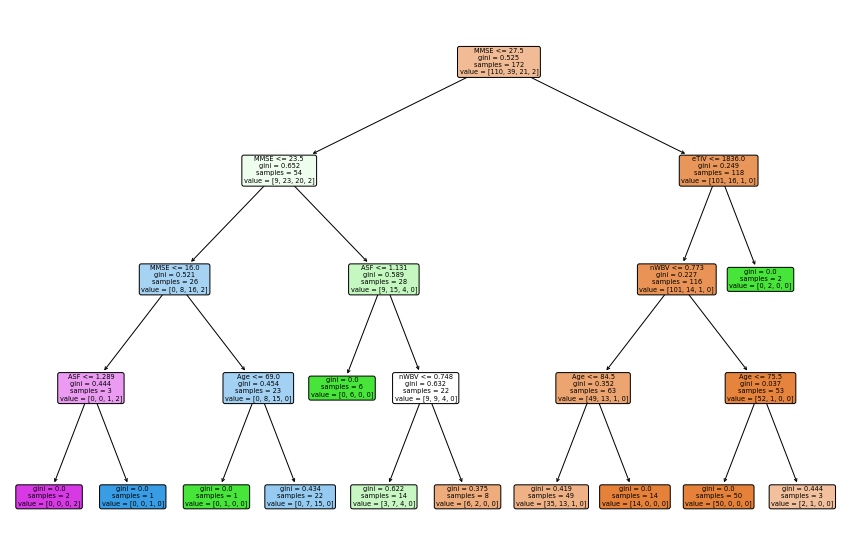

In [178]:
model = DecisionTreeClassifier(max_depth=4,random_state=42)

model.fit(X_train,y_train)

eval(X_test,y_test,model)
plot_tree(model,features)

## Max-depth = 1

Acc: 0.568
MSE: 0.000


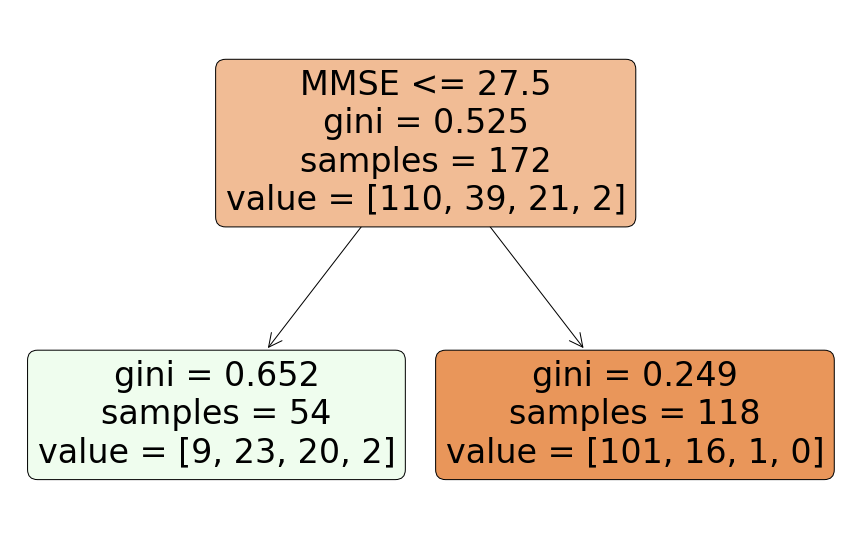

In [179]:
model = DecisionTreeClassifier(max_depth=1,random_state=42)

model.fit(X_train,y_train)

eval(X_test,y_test,model)
plot_tree(model,features)

The results seams to be better according to the evaluation function, but if we look at the leaves, we see that most of the subjects are not sick so 'Not Sick' is the safest geuss.

![smbc.png](smbc.png)

## Min samples leaf = 5

Acc: 0.614
MSE: 0.159


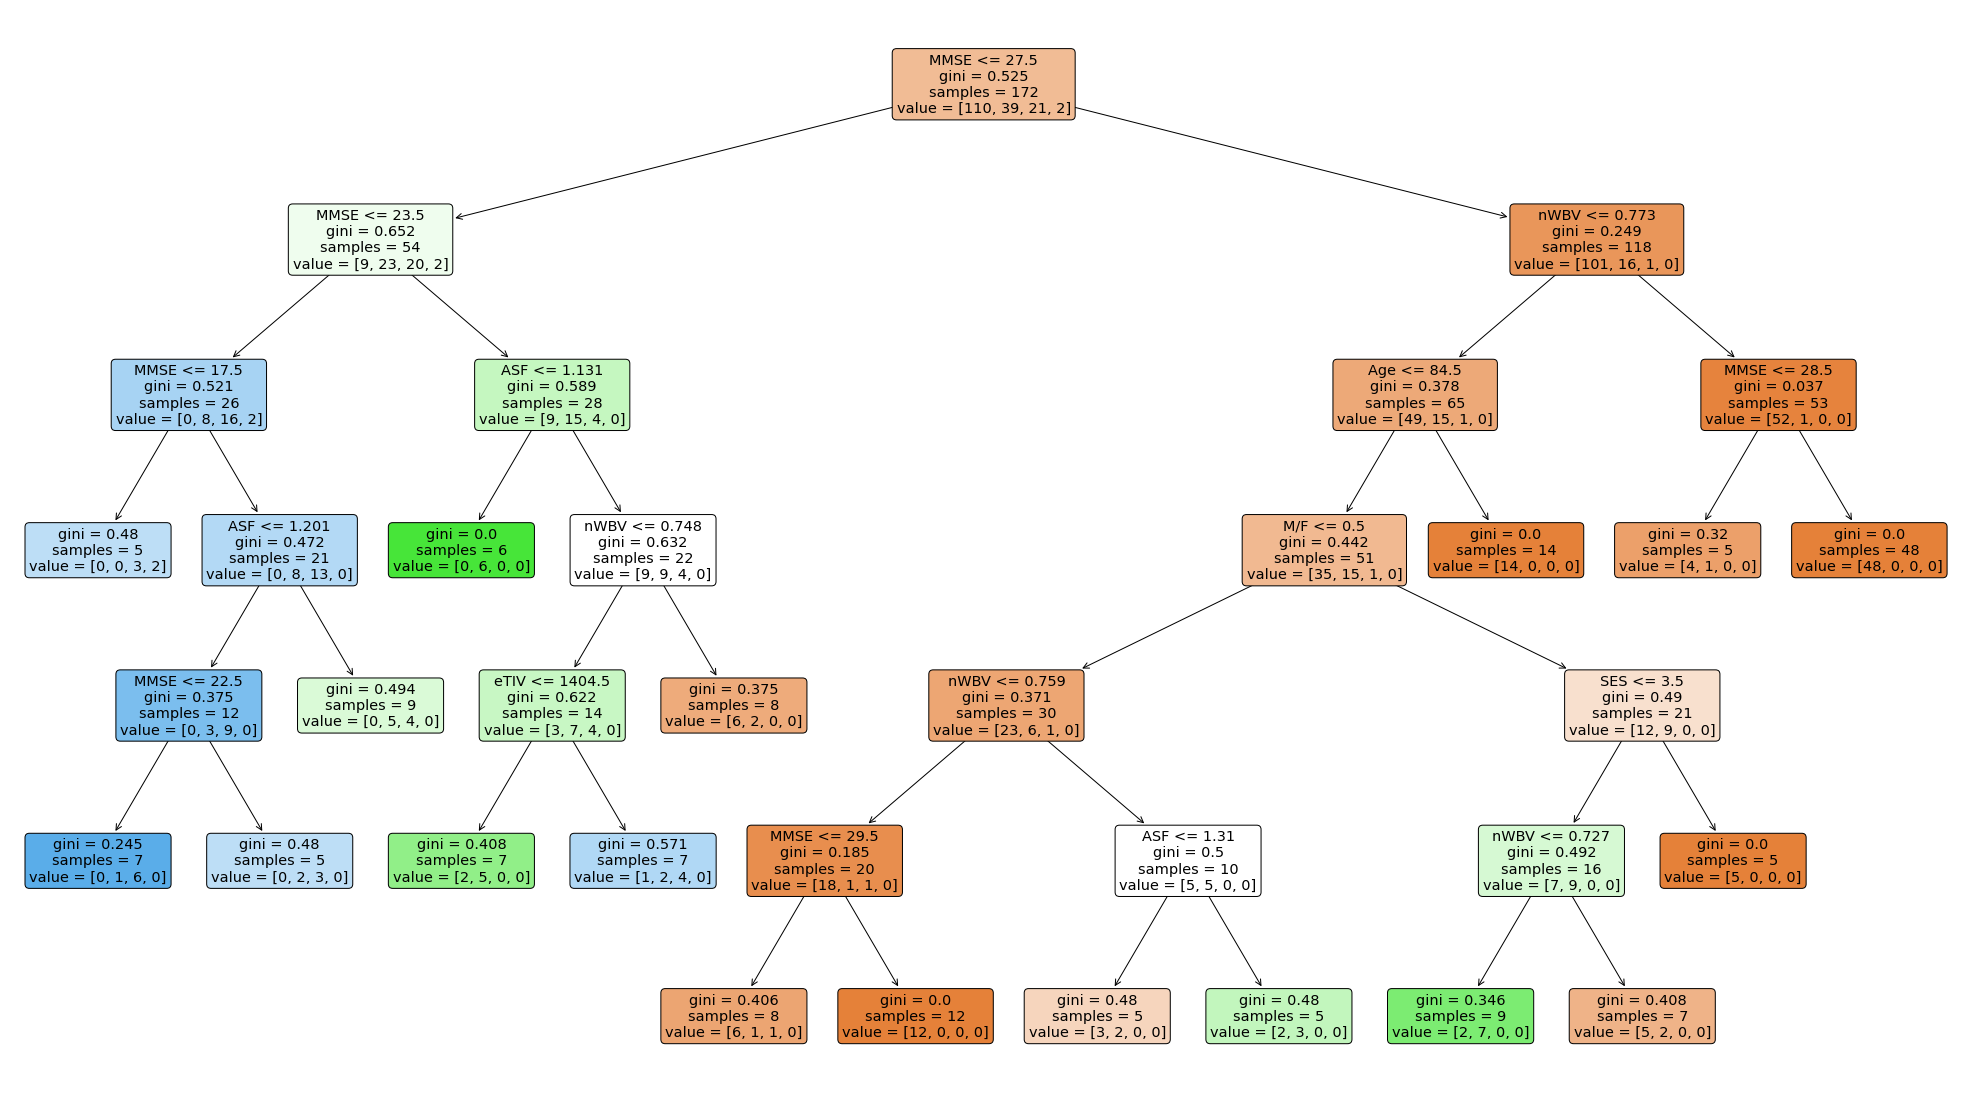

In [180]:
model = DecisionTreeClassifier(min_samples_leaf=5,random_state=42)

model.fit(X_train,y_train)

eval(X_test,y_test,model)

plot_tree(model,features,(35,20))

## Min samples split = 5

Acc: 0.591
MSE: 0.114


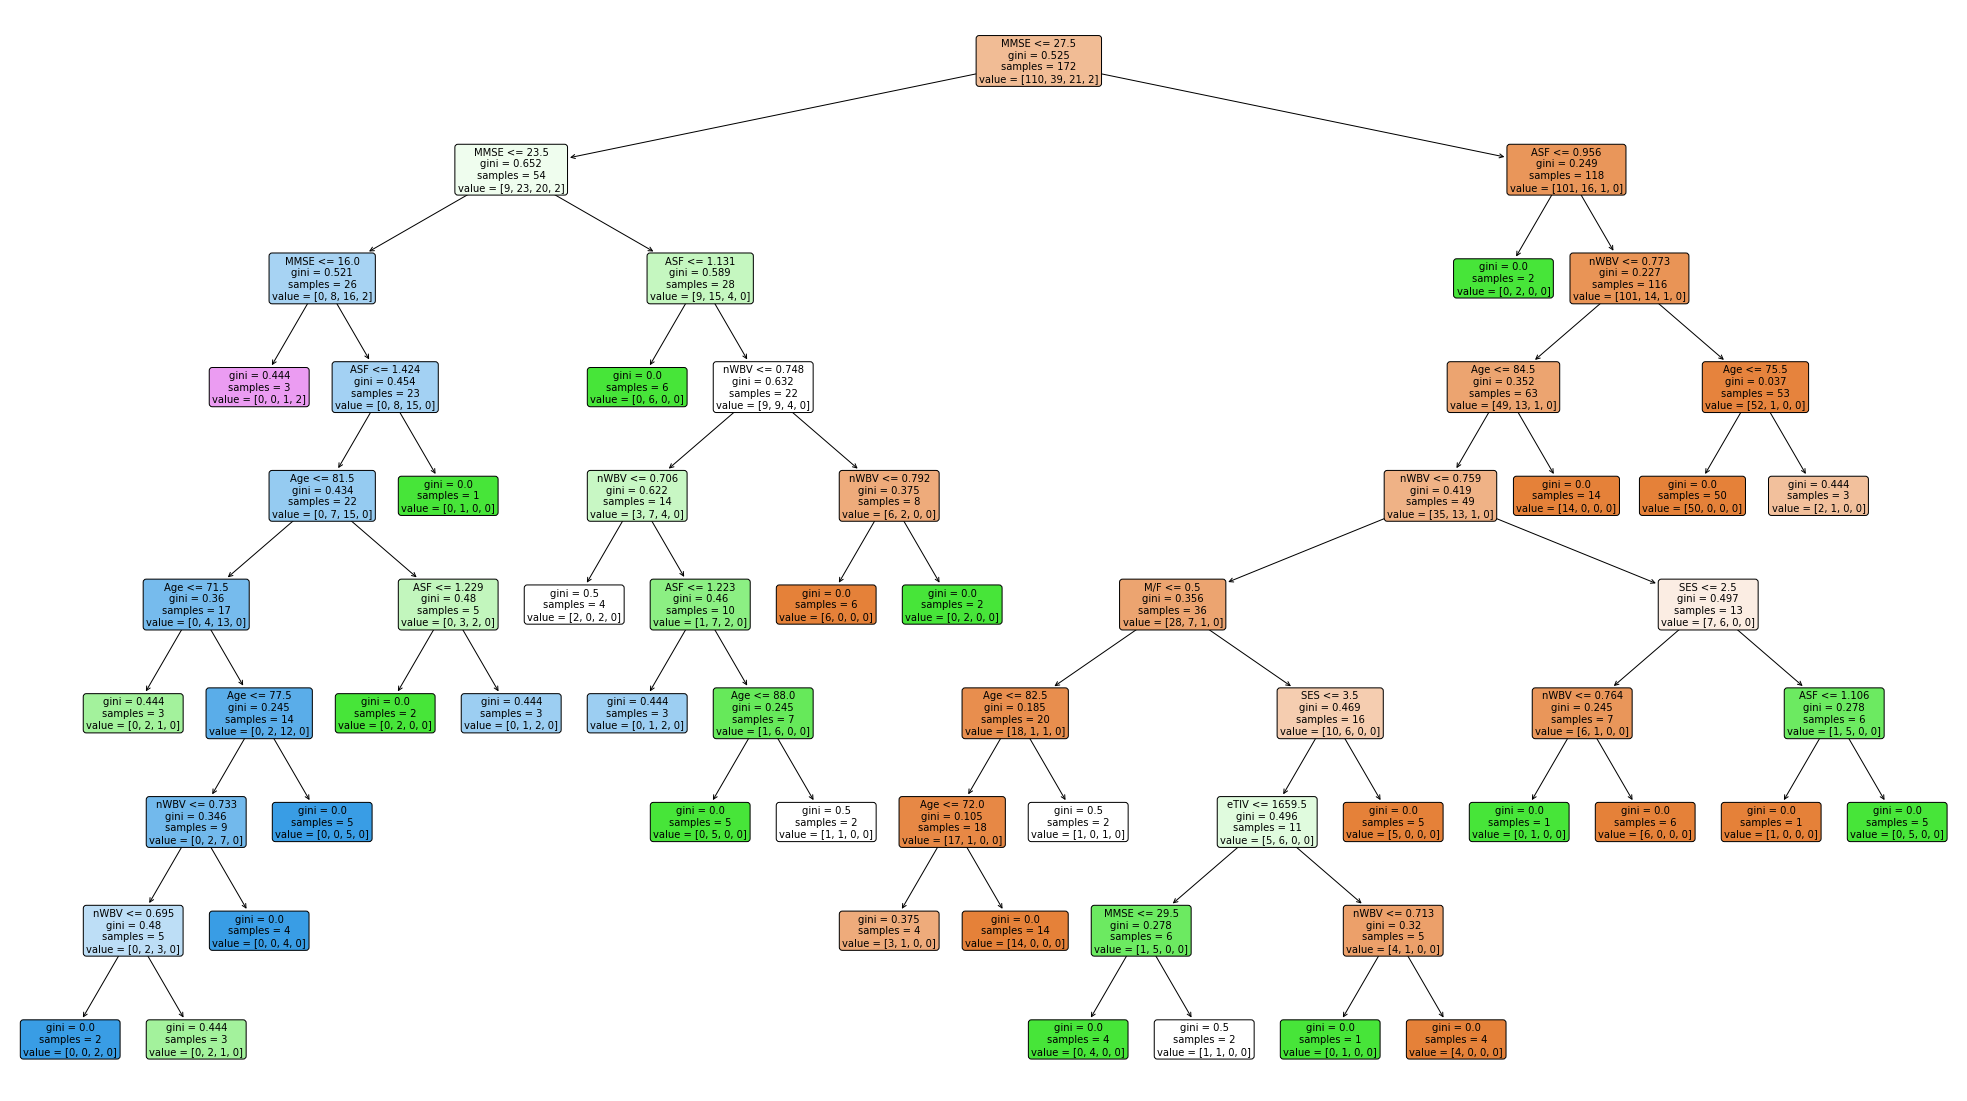

In [181]:
model = DecisionTreeClassifier(min_samples_split=5,random_state=42)

model.fit(X_train,y_train)

eval(X_test,y_test,model)

plot_tree(model,features,(35,20))